## Multiple Regression

In [15]:
!mamba install pandas
!mamba install statsmodels
!mamba install scikit-learn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.7168999999985098 seconds
All requested packages already installed.
mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.5348999999985099 seconds
All requested packages already installed.
mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels, seaborn, scikit-learn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.8631000000014901 seconds
  Name                          Version                       Build                         Channel                       
──────────────────────────────────────────────────────────────────────────

In [5]:
!mamba install seaborn

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, statsmodels, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 0.5997999999970197 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ seaborn                       0.13.2                        hd8ed1ab_3                    conda-forge                   
+ seaborn-base                  0.13.2                        pyhd8ed1ab_3                  conda-forge                   


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

**Introduction**
As you have learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to compare more than one variable to the variable you're measuring against. This provides the opportunity for much more thorough and flexible analysis.

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

To address the business' request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

Exploring and cleaning data
Using plots and descriptive statistics to select the independent variables
Creating a fitting multiple linear regression model
Checking model assumptions
Interpreting model outputs and communicating the results to non-technical stakeholders

In [40]:
#Load the dataset
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


**Data exploration**
The features in the data are:

TV promotional budget (in "Low," "Medium," and "High" categories)
Social media promotional budget (in millions of dollars)
Radio promotional budget (in millions of dollars)
Sales (in millions of dollars)
Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

**Create a pairplot of the data**
Create a pairplot to visualize the relationship between the continous variables in data.

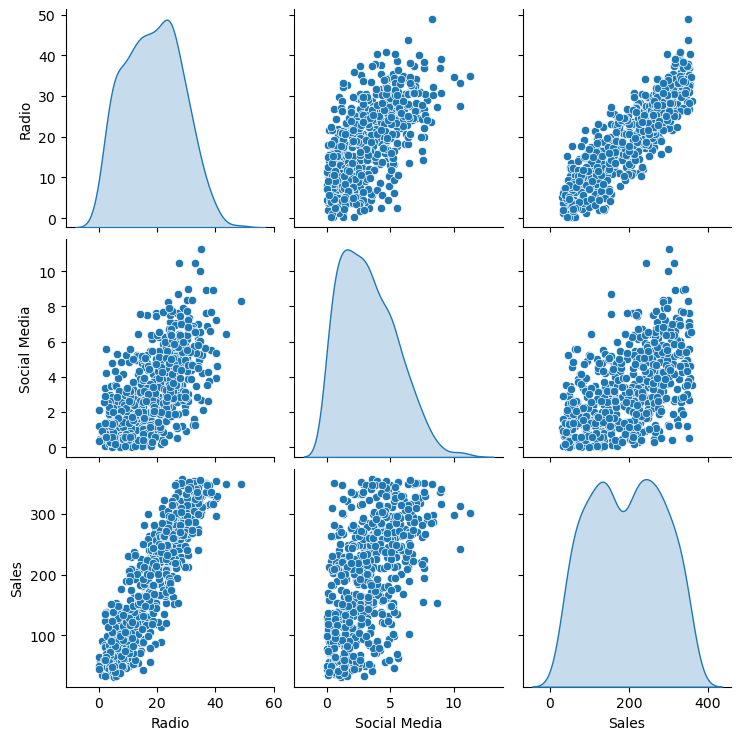

In [41]:
# Create a pairplot of the data.
#Instead of histograms on the diagonal, use Kernel Density Estimates (KDE)
sns.pairplot(data, diag_kind = 'kde')

**Question: Which variables have a linear relationship with Sales? Why are some variables in the data excluded from the preceding plot?**

1. The variable Radio have a strong linear relationship with Sales. There is a linear relationship between Social Media and Sales but it not as strong as the relationship observed with Radio

2. The other variables such as TV and Influencer are excluded from the preceding plot because they are categorical variables.

**Calculate the mean sales for each categorical variable**
There are two categorical variables: TV and Influencer. To characterize the relationship between the categorical variables and Sales, find the mean Sales for each category in TV and the mean Sales for each category in Influencer.

In [48]:
# Calculate the mean sales for each TV category. 
print(data.groupby(['TV'])['Sales'].mean())

print("")

# Calculate the mean sales for each Influencer category. 
print(data.groupby(['Influencer'])['Sales'].mean())

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64


**Question: What do you notice about the categorical variables? Could they be useful predictors of Sales?**

The average Sales for High TV promotions is considerably higher than for Medium and Low TV promotions. TV may be a strong predictor of Sales

The caterogiies for Influencer have different average Sales, but the variation is not substantial. Influencer amy be a weak predictor of Sales.

In [49]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)

**Clean column names**
The ols() function doesn't run when variable names contain a space. Check that the column names in data do not contain spaces and fix them, if needed.

In [51]:
# Rename all columns in data that contain a space. 
data = data.rename(columns =  lambda col : col.replace(" ", "_"))

**Model building**
**Fit a multiple linear regression model that predicts sales**
Using the independent variables of your choice, fit a multiple linear regression model that predicts Sales using two or more independent variables from data.

In [52]:
# Define the OLS formula.
ols_formula = ('Sales ~ C(TV) + Radio')

# Create ols model
OLS = ols(formula = ols_formula, data = data)

# Fit the model
model = OLS.fit()

# Save the results summary.
model_results  = model.summary()
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 12 Feb 2026   Prob (F-statistic):          1.61e-287
Time:                        17:30:16   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: Which independent variables did you choose for the model, and why?**

1. TV was selected, as the preceding analysis showed a strong relationship between TV promotional budget and average Sales.
2. Radio was selected because the pairplot showed a strong linear relationship between Radio and Sales.
3. Influencer was not selected because it did not show strong relationship to Sales in the preceding analysis.
4. Social_Media was not selected because it doesn't improve the accuracy for the model.

**Check model assumptions**
For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity.**

Check that all five multiple linear regression assumptions are upheld for your model.

**Model assumption: Linearity**
Create scatterplots comparing the continuous independent variable(s) you selected previously with Sales to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

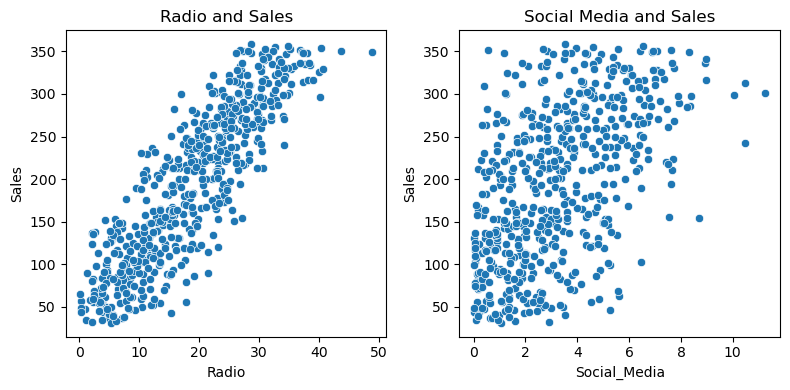

In [57]:
# Create a scatterplot for each independent variable and the dependent variable.
fig,axes = plt.subplots(1,2, figsize =(8,4))

#Create a scatterplot between radio and sales
sns.scatterplot(x= data['Radio'], 
                y = data['Sales'], 
                ax= axes[0])
axes[0].set_title ('Radio and Sales')

#Create a scatterplot between social media and sales
sns.scatterplot(x= data['Social_Media'], 
                y = data['Sales'], 
                ax= axes[1])
axes[1].set_title ('Social Media and Sales')

plt.tight_layout()

**Question: Is the linearity assumption met?**

1. The linearity assumption holds for Radio, as there is a clear linear relationship in the scatterplot between Radio and Sales. 
2. Social_Media was not included in the preceeding multiple linear regression model, but it does appear to have a linear relationship with Sales.

**Model assumption: Independence**
The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

**Model assumption: Normality**
Create the following plots to check the normality assumption:

**Plot 1:** Histogram of the residuals
**Plot 2:** Q-Q plot of the residuals

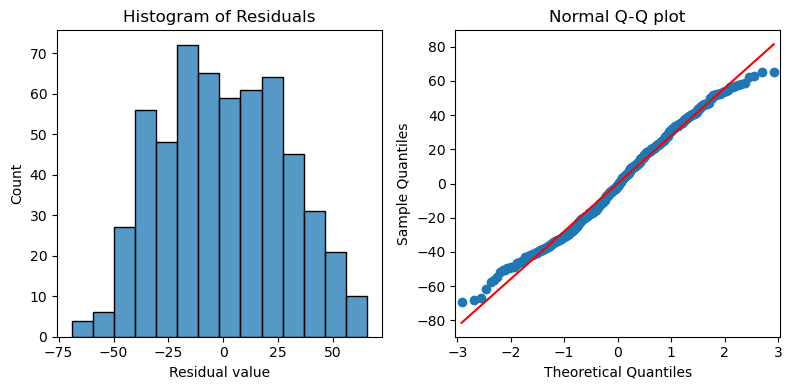

In [61]:
# Calculate the residuals.
residuals = model.resid

fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])
axes[0].set_title('Histogram of Residuals')
axes[0].set_xlabel("Residual value")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax = axes[1])
axes[1].set_title('Normal Q-Q plot')

plt.tight_layout()

**Question: Is the normality assumption met?**

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption if met for this mode.

The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

**Model assumption: Homoscedasticity**
The homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X.

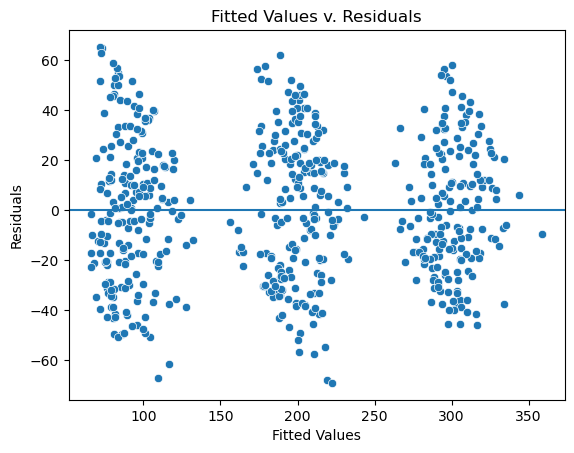

In [62]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
fig.axhline(0)
plt.show()

**Question: Is the constant variance assumption met?**

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

**Model assumption: No multicollinearity**
The no multicollinearity assumption states that no two independent variables (Xi and Xj) can be highly correlated with each other.

Two common ways to check for multicollinearity are to:

1. Create scatterplots to show the relationship between pairs of independent variables
2. Use the variance inflation factor to detect multicollinearity

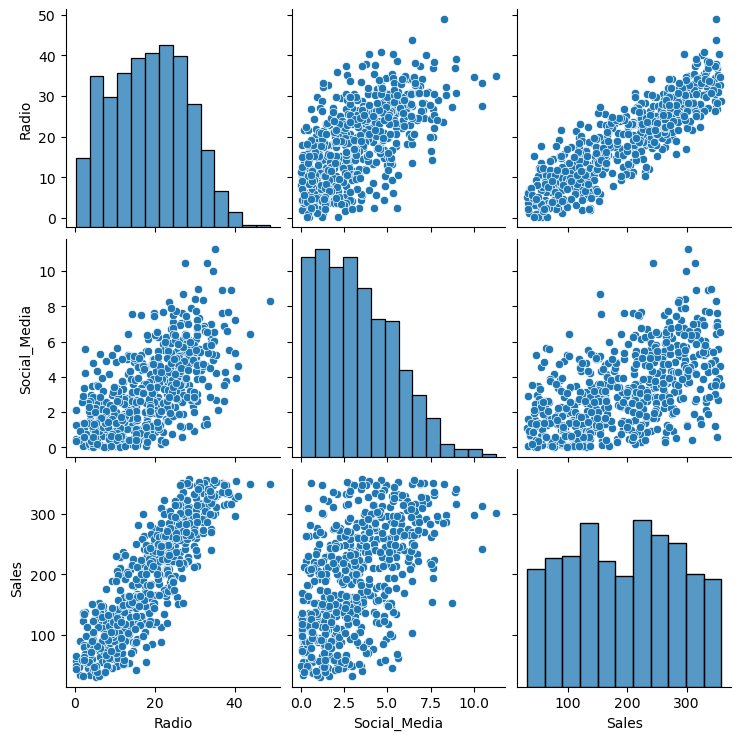

In [63]:
# Create a pairplot of the data

sns.pairplot(data);

In [66]:
# Calculate the variance inflation factor (optional).
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create the subset of the data with the continue independent variables
X = data[["Radio", "Social_Media"]]

# Calculate the variance inflation factor for each variable
vif = [variance_inflation_factor(X.values, i ) for i in range (X.shape[1])]

# Create a DataFrame with the VIF results for the columns names in X
df_vif = pd.DataFrame(vif, index=X.columns, columns=["VIF"])
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


**X.values**
This converts your DataFrame X into a NumPy array.
variance_inflation_factor() expects a NumPy matrix, not a DataFrame.

range(X.shape[1])
X.shape[1] is the number of columns (predictors).

VIF = 1 → no multicollinearity

VIF > 5 → moderate multicollinearity

VIF > 10 → serious multicollinearity

**Question : Is the no multicollinearity assumption met?**

The preceding model only has one continous independent variable, meaning there are no multicollinearity issues.

If a model used both Radio and Social_Media as predictors, there would be moderate linear relationship Radio and Social_Media that violates the multicollinearity assumption. Furthermore, the variance inflation factor when both Radio and Social_Media are inclused in the model is 5.17 for each variable, indicating high multicollinearity.

In [67]:
#Display the OLS regression results
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 12 Feb 2026   Prob (F-statistic):          1.61e-287
Time:                        17:30:16   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question: What is your interpretation of the model's R-squared?**

Using TV and Radio as the independent variables results in a multiple linear regression model with R^2=0.904. In other words, the model explains 90.4% of the variation in Sales. This makes the model an excellent predictor of Sales

Question: What are the model coefficients?

When TV and Radio are used to predict Sales, the model coefficients are:
$\beta_0$ = 217.6367
$\beta_TVLow$ = -152.0897
$\beta_TVMedium$ = -73.4835
$\beta_Radio$ = 2.8864	

**Question: How would you write the relationship between Sales and the independent variables as a linear equation?**

Sales = $\beta_0$ + $\beta_1$ * X1 + $\beta_2$ * X2 + $\beta_3$ * X3

Sales = $\beta_0$ + $\beta_TVLow$ * $X_TVLow$ + $\beta_TVMedium$ * $X_TVMedium$  + $\beta_Radio$ * $X_Radio$

Sales = 217.6367 - 152.0897 * $X_TVLow$ -73.4835 * $X_TVMedium$ + 2.8864	* $X_Radio$


**Question: What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?**

The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium and Low TV categories compared to the High category when Radio is at the same level.

For example, the model predicts that a Low TV promotion is 154.2971 lower on avarage compared to a High TV promotion given the same Radio promotion.

The coefficient for Radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coeffiencet is 0.000, meaning all coefficients are statistically significant at p = 0.05. The 95% confidence intervals for each coefficient shold be reported when presenting the result to stakeholders.

For example, there is a 95% chance that the interval[162.225,	-141.954] contains the true parameter of the slope of $\beta_TVLow$ , which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

Question: Why is it important to interpret the beta coefficients?

Beta coefficients allow you to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned

**Question: Do you think your model could be improved? Why or why not? How?**

Given how accurate the TV was a predictor, the model could be improved by getting a more granular view of the TV promotions, such as by considering more categories or the actual TV promotional budget.

Furthermore, additional variables, suchas the location of the marking campaign or the time of year could increase the model accuracy.

**Conclusion**
**What are the key takeaways from this lab?**

1. Multiple linear regression is a powerful tool to estimate a dependent continous variable from several independent variables.
2. Exploratory data analysis is useful for selecting both numeric and categorical features for multiple linear regression.
3. Fitting multiple linear regression models may require trial and error to select variables that fit an accurate model while maintaining model assumptions.
**What results can be presented from this lab?**

According to the model, high TV promotional budgets result in significantly more sales than medium and low TV promotional budgets. For example, the model predicts that a Low TV promotion is **154.2971** lower on average than a high TV promotion given the same Radio promotion.

The coefficient for radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is 0.000, meaning all coefficients are statistically significant at p = 0.05. There is a 95% chance that the interval[162.225,	-141.954] contains the true parameter of the slope of $\beta_TVLow$ , which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

**How would you frame your findings to external stakeholders?**

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by **$73.4835** million (95% CI [-80.530, -66.437]), and switching from a high to low TV promotional budget reduces sales by **$152.0897** million (95% CI [-162.225,	-141.954]).  The model also estimates that an increase of $1
 million in the radio promotional budget will yield a 
 million increase in sales (95% CI [2.460,	3.312]).

Thus, it is recommended that the business allocate a high promotional budget to TV when possible and invest in radio promotions to increase sales.

# Predict body mass based on the other variables. Next divide the dataset into the independent variables or axis and the dependent variable Y.

In [31]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [32]:
#Subset the required fields
penguins = penguins[['body_mass_g','bill_length_mm','sex','species']]
penguins.columns = ['body_mass_g','bill_length_mm','gender','species']

In [33]:
penguins.dropna(inplace=True)
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,Male,Adelie
1,3800.0,39.5,Female,Adelie
2,3250.0,40.3,Female,Adelie
4,3450.0,36.7,Female,Adelie
5,3650.0,39.3,Male,Adelie


In [ ]:
#Predict body mass based on other variables

In [34]:
penguins_X = penguins[['bill_length_mm','gender','species']]
penguins_y = penguins[['body_mass_g']]

In [35]:
from sklearn.model_selection import train_test_split

# Create training dataset and a testing dataset
#random_state - helps to replicate the work
X_train, X_test, y_train, y_test = train_test_split(penguins_X,penguins_y,
                                                   test_size = 0.3, random_state = 42)

In [ ]:
# Build the model

In [36]:
# ols formula where C is for categorical variable
ols_formula = 'body_mass_g ~ bill_length_mm + C(gender) + C(species)'

In [25]:
from statsmodels.formula.api import ols

In [37]:
#ols data where axis=1 → concatenate columns  from trained dataset
ols_data = pd.concat([X_train, y_train], axis = 1)
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [39]:
# Get the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           1.31e-92
Time:                        15:47:53   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.Male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""